In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# # !pip install category_encoders

In [2]:
# crime_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data-LA-Project/Mar424_converted_77_Features')
# print(crime_df.shape)

In [3]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
# Load the dataset
crime_df=pd.read_csv("Mar424_converted_77_Features", na_values=['NULL', '?', 'NONE', ' '])

print("Shape of dataset:",crime_df.shape)
crime_df.columns

Shape of dataset: (2883802, 77)


Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

# Prepare for Data Training

In [5]:
# Convert 'Date_Rptd' and 'DATE_OCC' to datetime
crime_df['Date_Rptd'] = pd.to_datetime(crime_df['Date_Rptd'])

In [6]:
crime_df.columns

Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure', 'Total_Precipitation', 'Crime_Category',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_1

In [7]:
# !pip install xgboost

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.preprocessing import scale

## Drop columns

In [9]:
# Drop all the weather
crime_df=crime_df.drop(['Avg_Temp', 'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed',
       'Avg_Pressure','Total_Precipitation'], axis =1)

# Droop all victim
crime_df=crime_df.drop(['Vict_Sex_M', 'Vict_Sex_X','Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White'], axis =1)

In [10]:
crime_df.columns

Index(['Date_Rptd', 'DATE_OCC', 'TIME_OCC', 'AREA_NAME', 'Rpt_Dist_No',
       'Part_1-2', 'Crm_Cd', 'Crm_Cd_Desc', 'Vict_Age', 'LAT', 'LON',
       'Crime_Category', 'Crime_Category_Code', 'Weapon_Reported', 'AREA_2',
       'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8', 'AREA_9',
       'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14', 'AREA_15',
       'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20', 'AREA_21',
       'Day_of_Week_1', 'Day_of_Week_2', 'Day_of_Week_3', 'Day_of_Week_4',
       'Day_of_Week_5', 'Day_of_Week_6', 'Month_2', 'Month_3', 'Month_4',
       'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10',
       'Month_11', 'Month_12', 'Year_2011', 'Year_2012', 'Year_2013',
       'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017', 'Year_2018',
       'Year_2019', 'Year_2020', 'Year_2021', 'Year_2022', 'Year_2023'],
      dtype='object')

# Data Training

In [11]:
# Selecting predictor and target variables

X = crime_df.drop(['Date_Rptd','Rpt_Dist_No','DATE_OCC', 'AREA_NAME', 'Crm_Cd_Desc', 'Crm_Cd', 'Crime_Category_Code','Crime_Category'], axis=1)
y = crime_df['Crime_Category']

In [12]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Scale the data using the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model LR -Without Victim, Weather: lr_wo_victim_weather

In [14]:
# Training the model and predicting- LR-Full data

logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_train_scaled, y_train.ravel()) # ravel to flatten data
y_pred = logreg.predict(X_test_scaled)

print("Logistic Regression")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Logistic Regression
Accuracy: 0.7278820863407893
Confusion Matrix:
[[135094   1280      3   4223      0    581   2350      0]
 [    58  23438     58      0      0    165  17869      0]
 [  8089   2942     41    104      0  23446   8100      0]
 [ 19640    223      0   5494      0    569    418      0]
 [  4769   2721      3    916      0    243   4672      0]
 [  8074   2038    107   1384      0 220565   4359      0]
 [  4298  13935     57     32      0    877  35180      1]
 [   888   5264     31      0      0      0  12160      2]]



/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.75      0.94      0.83    143531
        Fraud and Financial Crimes       0.45      0.56      0.50     41588
              Miscellaneous Crimes       0.14      0.00      0.00     42722
             Robbery and Extortion       0.45      0.21      0.29     26344
                   Sexual Offenses       0.00      0.00      0.00     13324
                Theft and Burglary       0.89      0.93      0.91    236527
     Vandalism and Property Damage       0.41      0.65      0.50     54380
 Violations and Restraining Orders       0.67      0.00      0.00     18345

                          accuracy                           0.73    576761
                         macro avg       0.47      0.41      0.38    576761
                      weighted avg       0.68      0.73      0.68    576761



/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
# # Classification report of the target variable.
# print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.75      0.94      0.83    143531
        Fraud and Financial Crimes       0.45      0.56      0.50     41588
              Miscellaneous Crimes       0.14      0.00      0.00     42722
             Robbery and Extortion       0.45      0.21      0.29     26344
                   Sexual Offenses       0.00      0.00      0.00     13324
                Theft and Burglary       0.89      0.93      0.91    236527
     Vandalism and Property Damage       0.41      0.65      0.50     54380
 Violations and Restraining Orders       0.67      0.00      0.00     18345

                          accuracy                           0.73    576761
                         macro avg       0.47      0.41      0.38    576761
                      weighted avg       0.68      0.73      0.68    576761



/Users/henglyaun/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [16]:
# Feature importances
feature_importances = logreg.coef_[0]
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
            Feature  Importance
5   Weapon_Reported    2.299368
2          Vict_Age    0.240203
0          TIME_OCC    0.103458
35          Month_5    0.070735
37          Month_7    0.067075
38          Month_8    0.062339
39          Month_9    0.060099
36          Month_6    0.059495
40         Month_10    0.057703
31    Day_of_Week_6    0.055345
33          Month_3    0.054190
41         Month_11    0.051694
42         Month_12    0.050318
34          Month_4    0.046640
49        Year_2017    0.042707
32          Month_2    0.040231
30    Day_of_Week_5    0.025112
4               LON    0.018741
23          AREA_19    0.018541
47        Year_2015    0.018187
51        Year_2019    0.015372
52        Year_2020    0.013175
48        Year_2016    0.012603
55        Year_2023    0.012267
46        Year_2014    0.009606
53        Year_2021    0.007834
13           AREA_9    0.002799
54        Year_2022   -0.001234
50        Year_2018   -0.003564
27    Day_of_Week_2

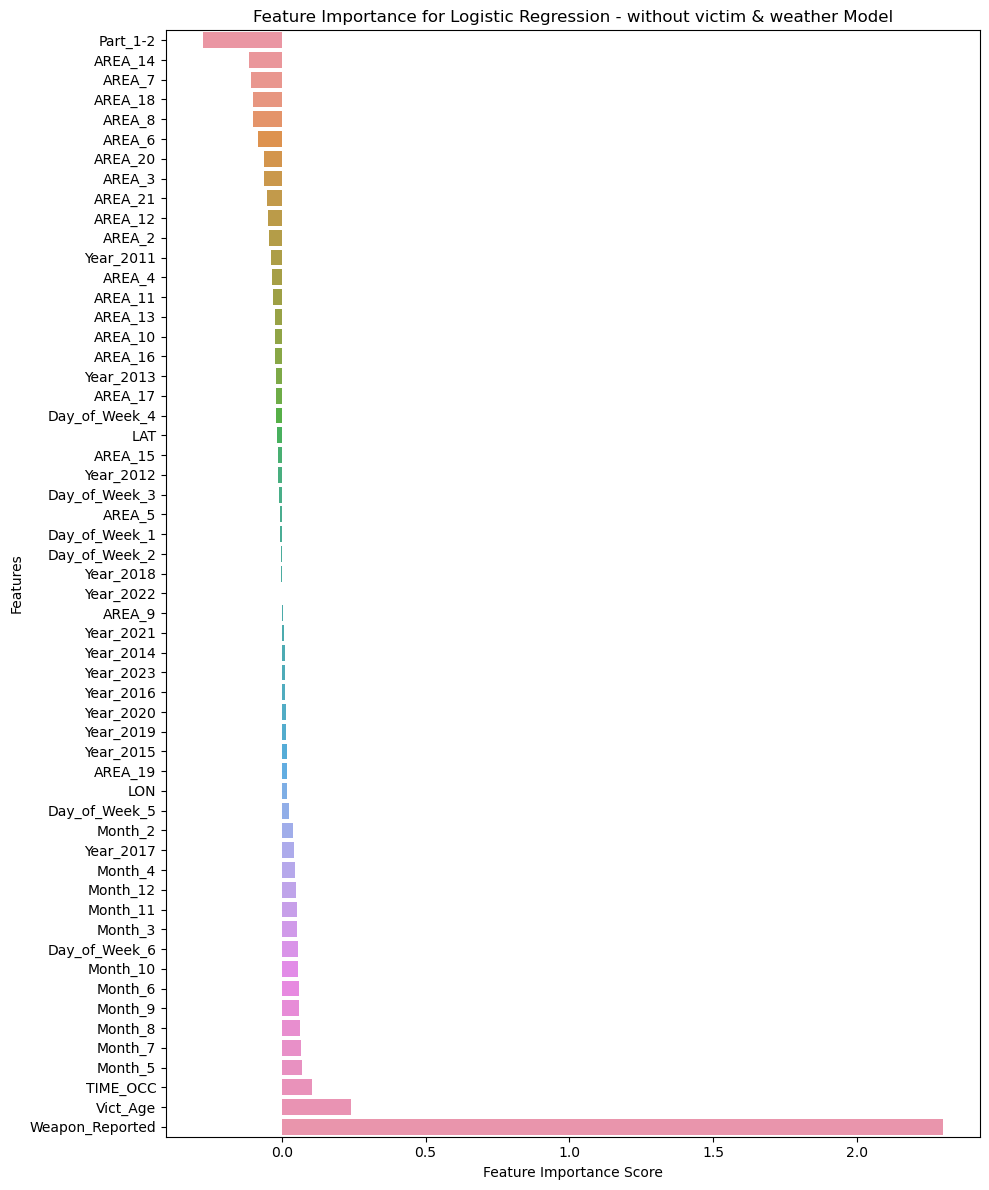

In [17]:
# Feature importances
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Logistic Regression - without victim & weather Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

ROC AUC: 0.8763031207089962
Accuracy: 0.7278820863407893
Sensitivity: 0.411731947182962
Specificity: 0.9571177668204702


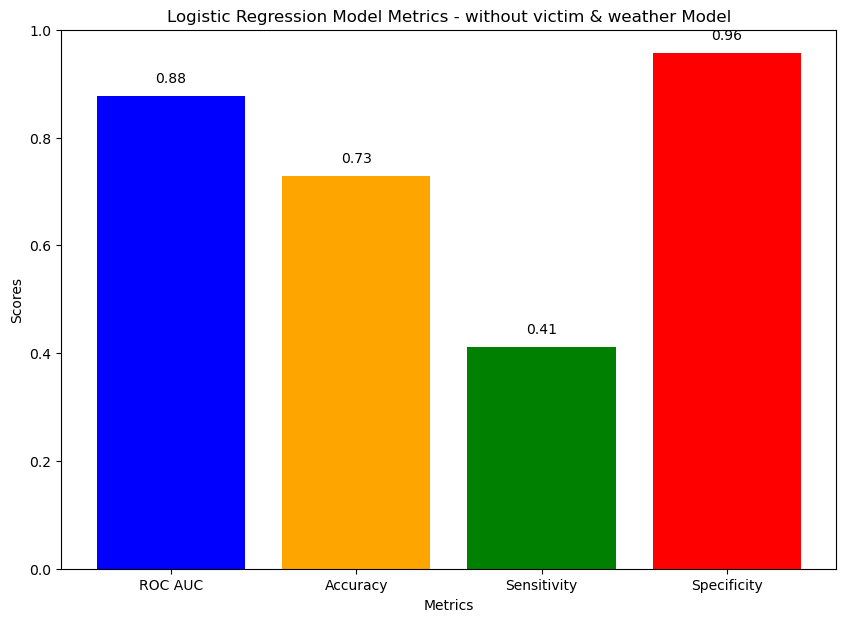

In [18]:

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate specificity for binary classification
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Calculate metrics
y_pred_prob = logreg.predict_proba(X_test_scaled)
y_pred = logreg.predict(X_test_scaled)

# For multi-class ROC AUC, y_test needs to be binarized
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class="ovr", average="macro")

# Calculate Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred, average="macro")

# Calculate Specificity
# Since specificity is not a built-in metric, we calculate it manually for each class and take the average
specificity_scores = []
for class_label in np.unique(y_train):
    # Binarize y_test for the current class
    y_test_binary = (y_test == class_label).astype(int)
    y_pred_binary = (y_pred == class_label).astype(int)
    specificity_scores.append(specificity(y_test_binary, y_pred_binary))

average_specificity = np.mean(specificity_scores)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Creating a dictionary for metrics to plot
metrics_dict = {
    'ROC AUC': roc_auc,
    'Accuracy': accuracy,
    'Sensitivity': sensitivity,
    'Specificity': average_specificity
}

# Print the metrics
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", average_specificity)

# Plotting the metrics
plt.figure(figsize=(10, 7))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Logistic Regression Model Metrics - without victim & weather Model')
plt.ylim(0, 1)
for i, v in enumerate(metrics_dict.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()


## Model XGBOOST Without Victim, Weather: xgb_wo_victim_weather

In [19]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the encoder to the target variable and transform it to integer labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now, train your XGBClassifier with the encoded target variable
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train_encoded)

# Predict on the scaled test set using the trained model
y_pred = xgb_model.predict(X_test_scaled)

# If you need to convert predictions back to original labels for interpretation
y_pred_labels = label_encoder.inverse_transform(y_pred)

print("XGBoost")

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate the accuracy using the encoded test labels
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Calculate the classification report using the original string labels
# Convert encoded predictions back to original labels for interpretability
y_pred_labels = label_encoder.inverse_transform(y_pred)
class_report = classification_report(y_test, y_pred_labels)
print(f"Classification Report:\n{class_report}")


XGBoost
Accuracy: 0.7618771033408985
Confusion Matrix:
[[132930    875   1043   4604    329   1166   2570     14]
 [    57  29443    317      1    156    256  11215    143]
 [  6453   2202   3484    151    487  23576   6202    167]
 [ 16319    247     23   8350    151    912    336      6]
 [  4186   2484    595    693   1531    242   3527     66]
 [  5355   2622     38   1960     60 223537   2838    117]
 [  4065   9292    425     57    132    979  39037    393]
 [   875   4193    289      0     92     48  11739   1109]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.78      0.93      0.85    143531
        Fraud and Financial Crimes       0.57      0.71      0.63     41588
              Miscellaneous Crimes       0.56      0.08      0.14     42722
             Robbery and Extortion       0.53      0.32      0.40     26344
                   Sexual Offenses       0.52      0.11      0.19  

In [20]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
            Feature  Importance
5   Weapon_Reported    0.437995
1          Part_1-2    0.418745
18          AREA_14    0.026561
2          Vict_Age    0.008888
0          TIME_OCC    0.008737
9            AREA_5    0.008102
55        Year_2023    0.004539
11           AREA_7    0.004363
51        Year_2019    0.003922
12           AREA_8    0.003834
22          AREA_18    0.003817
54        Year_2022    0.003318
31    Day_of_Week_6    0.003254
50        Year_2018    0.002996
53        Year_2021    0.002995
25          AREA_21    0.002957
43        Year_2011    0.002870
52        Year_2020    0.002367
19          AREA_15    0.002352
44        Year_2012    0.002344
17          AREA_13    0.002289
7            AREA_3    0.002083
4               LON    0.001997
30    Day_of_Week_5    0.001995
16          AREA_12    0.001932
20          AREA_16    0.001926
3               LAT    0.001775
49        Year_2017    0.001750
10           AREA_6    0.001744
8            AREA_4

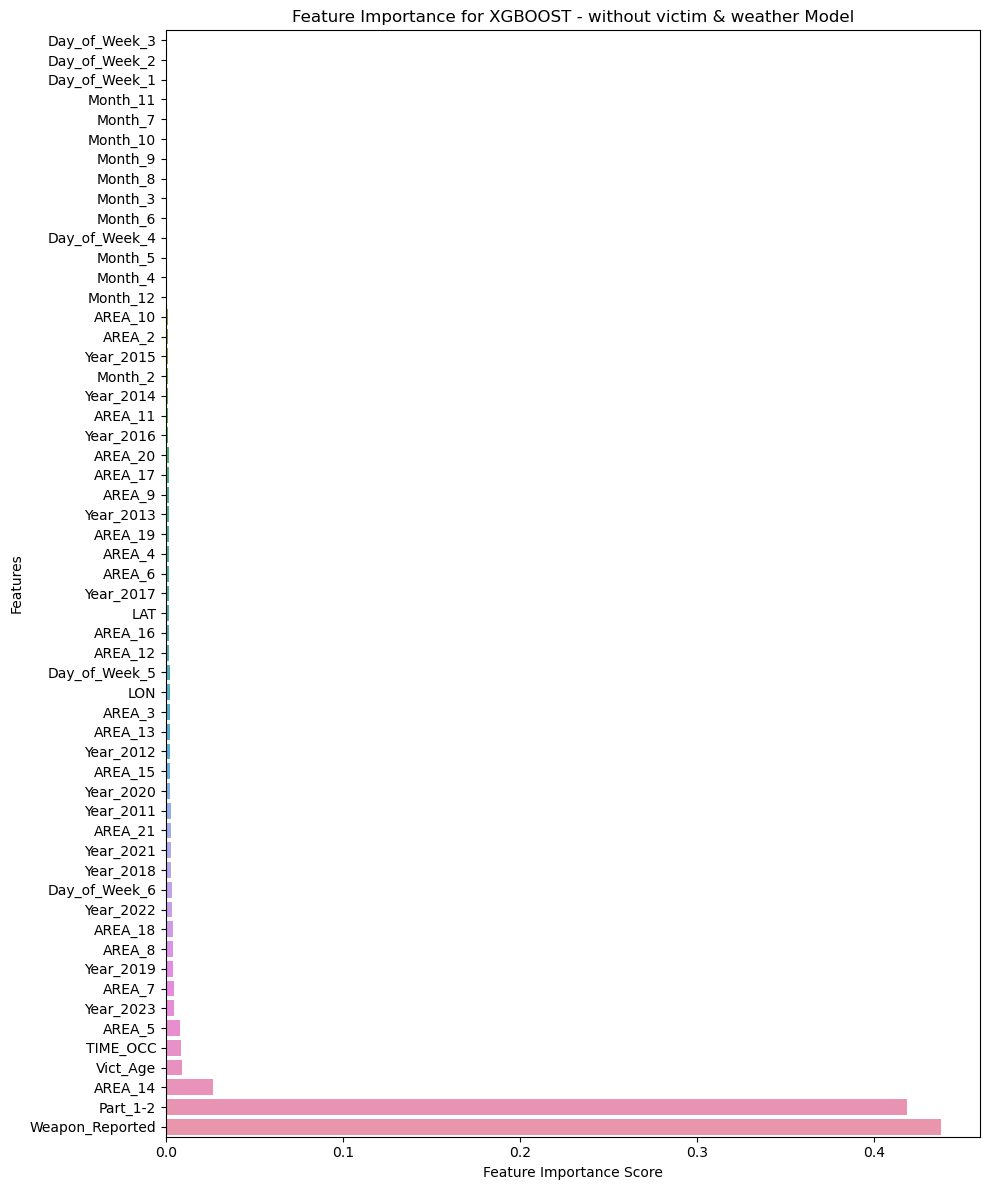

In [21]:
# Feature importances
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for XGBOOST - without victim & weather Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

ROC AUC: 0.8763031207089962
Accuracy: 0.7618771033408985
Sensitivity: 0.48386433898775705
Specificity: 0.9620862141001042


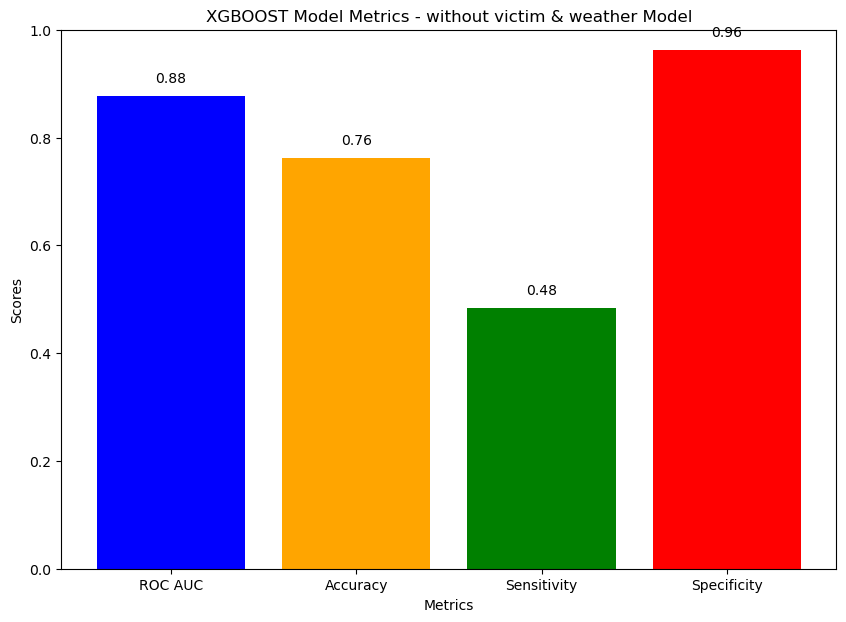

In [22]:

# Import necessary libraries
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Calculate Sensitivity (Recall) using encoded test labels
sensitivity = recall_score(y_test_encoded, y_pred, average="macro")

# For multi-class ROC AUC, y_test needs to be binarized using encoded labels
y_test_binarized = label_binarize(y_test_encoded, classes=np.unique(y_train_encoded))

# Calculate ROC AUC using probabilities and binarized encoded test labels
roc_auc = roc_auc_score(y_test_binarized, y_pred_prob, multi_class="ovr", average="macro")

# Calculate Specificity
# Since specificity is not a built-in metric, we calculate it manually for each class and take the average
specificity_scores = []
for class_label in np.unique(y_train_encoded):
    # Binarize y_test for the current class using encoded labels
    y_test_binary = (y_test_encoded == class_label).astype(int)
    y_pred_binary = (y_pred == class_label).astype(int)
    specificity_scores.append(specificity(y_test_binary, y_pred_binary))

average_specificity = np.mean(specificity_scores)

# Creating a dictionary for metrics to plot
metrics_dict = {
    'ROC AUC': roc_auc,
    'Accuracy': accuracy,
    'Sensitivity': sensitivity,
    'Specificity': average_specificity
}

# Print the metrics
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", average_specificity)

# Plotting the metrics
plt.figure(figsize=(10, 7))
plt.bar(metrics_dict.keys(), metrics_dict.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('XGBOOST Model Metrics - without victim & weather Model')
plt.ylim(0, 1)
for i, v in enumerate(metrics_dict.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()


# Model RANDOM FOREST -Without Victim, Weather: rf_wo_victim_weather

In [23]:
# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the random forest classifier
rf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test_scaled)

# Evaluate the random forest classifier
accuracy_rf = accuracy_score(y_test, y_pred)
print("Accuracy of the random forest classifier:", accuracy_rf)

# Calculate the confusion matrix using the encoded test labels
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

Accuracy of the random forest classifier: 0.8038442266380702
Confusion Matrix:
[[133869    867    783   4756    209   1021   1954     72]
 [    82  31472    354      4    140    349   8691    496]
 [  4970   1872  11286    129    254  19515   4411    285]
 [ 12488    185     36  12379     88    922    233     13]
 [  3491   2089    596    760   3434    247   2574    133]
 [  3881   2144    356   1766     39 226019   2156    166]
 [  3339   8294    651     48    120    897  40000   1031]
 [   764   3658    369      2     68     94   8223   5167]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.82      0.93      0.87    143531
        Fraud and Financial Crimes       0.62      0.76      0.68     41588
              Miscellaneous Crimes       0.78      0.26      0.39     42722
             Robbery and Extortion       0.62      0.47      0.54     26344
                   Sexual Offenses       0.

In [24]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Set pandas option to display all rows
pd.set_option('display.max_rows', None)

# Print the full list of feature importances
print("Feature Importances:")
print(feature_importance_df.sort_values(by='Importance', ascending=False))

Feature Importances:
            Feature  Importance
5   Weapon_Reported    0.240165
1          Part_1-2    0.210905
2          Vict_Age    0.095087
0          TIME_OCC    0.094877
3               LAT    0.090217
4               LON    0.089963
29    Day_of_Week_4    0.007753
28    Day_of_Week_3    0.007718
27    Day_of_Week_2    0.007619
26    Day_of_Week_1    0.007575
38          Month_8    0.006491
36          Month_6    0.006454
35          Month_5    0.006432
33          Month_3    0.006428
34          Month_4    0.006421
40         Month_10    0.006407
37          Month_7    0.006352
39          Month_9    0.006314
41         Month_11    0.006050
42         Month_12    0.005913
30    Day_of_Week_5    0.005835
32          Month_2    0.005822
31    Day_of_Week_6    0.005054
48        Year_2016    0.004741
49        Year_2017    0.004667
46        Year_2014    0.004495
47        Year_2015    0.004481
50        Year_2018    0.004229
45        Year_2013    0.004152
43        Year_2011

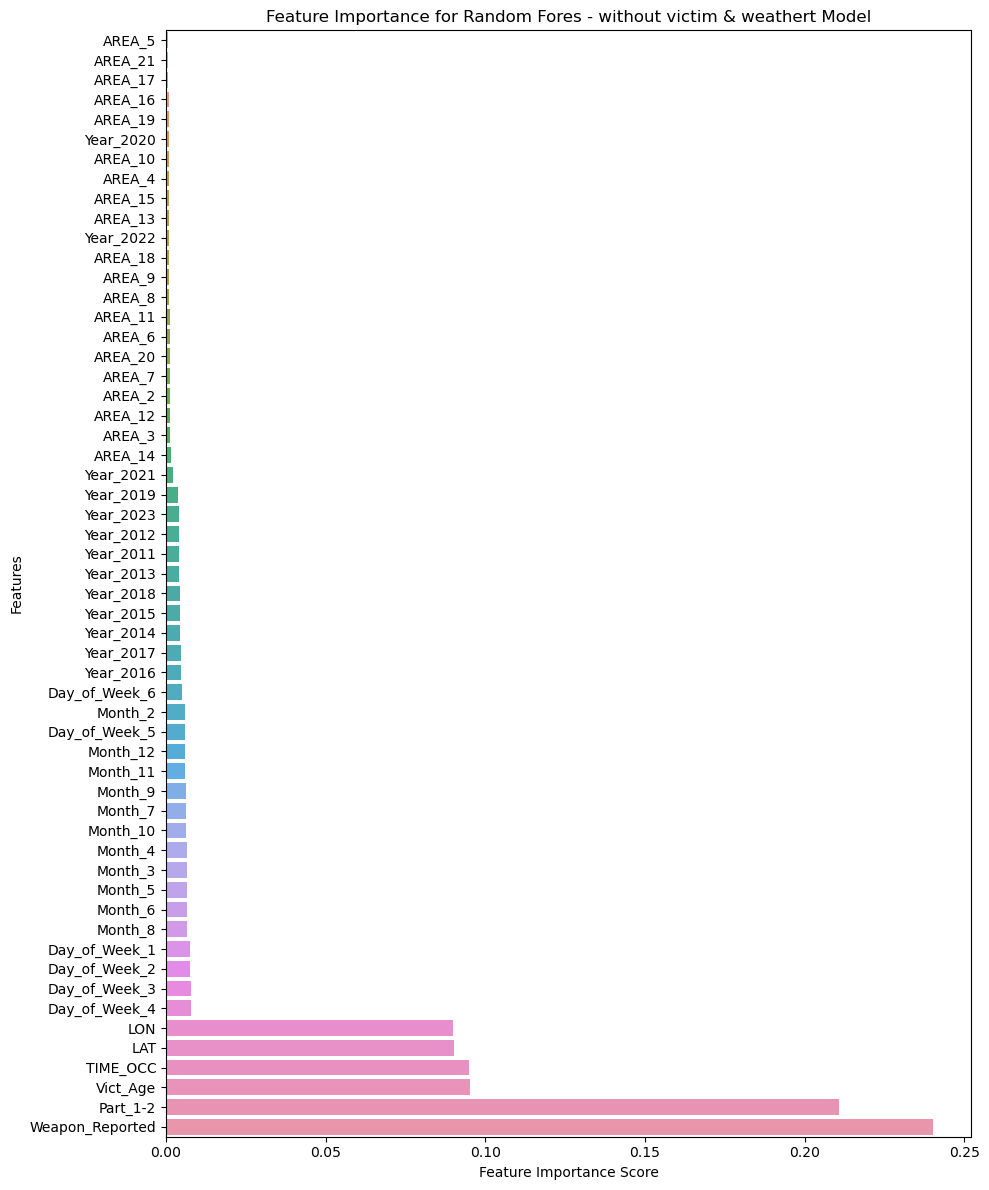

In [25]:
# Feature importances
feature_importances = rf.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance score in ascending order for the plot
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 12))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_sorted)

# Add labels and title to the plot
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance for Random Fores - without victim & weathert Model')

# Show the plot
plt.tight_layout()  # Adjust the layout to fit all the labels
plt.show()

ROC AUC: 0.8763031207089962
Accuracy: 0.8038442266380702
Sensitivity: 0.5817546812292621
Specificity: 0.9688137471486404


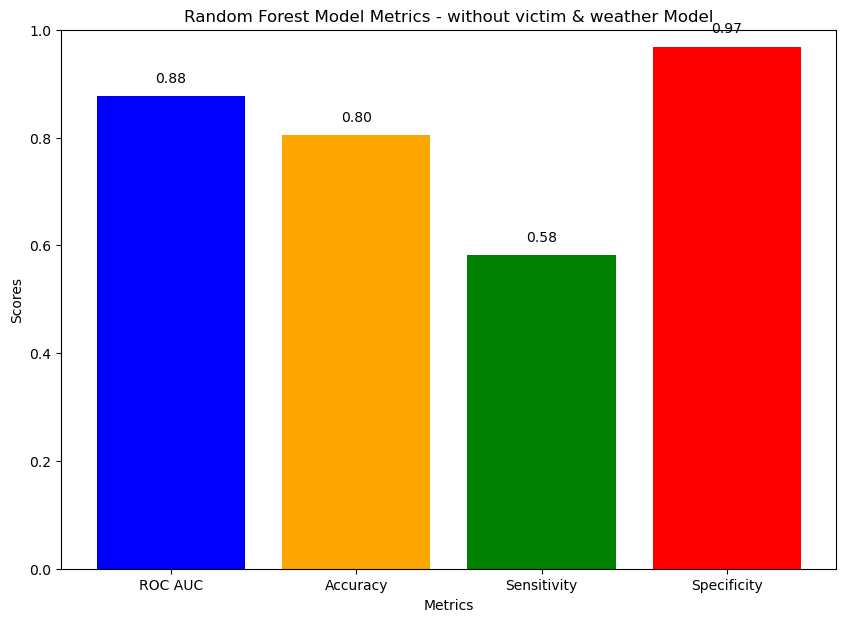

In [26]:
# Calculate Sensitivity (Recall)
sensitivity_rf = recall_score(y_test, y_pred, average="macro")

# For multi-class ROC AUC, y_test needs to be binarized
y_test_binarized = label_binarize(y_test, classes=np.unique(y))

# Calculate ROC AUC
roc_auc_rf = roc_auc_score(y_test_binarized, y_pred_prob, multi_class="ovr", average="macro")

# Calculate Specificity
# Since specificity is not a built-in metric, we calculate it manually for each class and take the average
specificity_scores_rf = []
for class_label in np.unique(y_train):
    # Binarize y_test for the current class
    y_test_binary = (y_test == class_label).astype(int)
    y_pred_binary = (y_pred == class_label).astype(int)
    specificity_scores_rf.append(specificity(y_test_binary, y_pred_binary))

average_specificity_rf = np.mean(specificity_scores_rf)

# Creating a dictionary for metrics to plot
metrics_dict_rf = {
    'ROC AUC': roc_auc_rf,
    'Accuracy': accuracy_rf,
    'Sensitivity': sensitivity_rf,
    'Specificity': average_specificity_rf
}

# Print the metrics
print("ROC AUC:", roc_auc_rf)
print("Accuracy:", accuracy_rf)
print("Sensitivity:", sensitivity_rf)
print("Specificity:", average_specificity_rf)

# Plotting the metrics
plt.figure(figsize=(10, 7))
plt.bar(metrics_dict_rf.keys(), metrics_dict_rf.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Random Forest Model Metrics - without victim & weather Model')
plt.ylim(0, 1)
for i, v in enumerate(metrics_dict_rf.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()


# Model KNN7 -Without Victim, Weather: knn_wo_victim_weather

In [27]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("KNN")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

# Classification report of the target variable.
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

KNN
Accuracy: 0.7223286595314177
Confusion Matrix:
[[130768   1554    620   6238    311   2339   1553    148]
 [   651  27138    991     26    651    995   9726   1410]
 [  7535   4204   2364    168    299  23571   4038    543]
 [ 16280    290     98   7100    188   2132    218     38]
 [  4432   3479    374    883    636    650   2541    329]
 [  5367   2867   2042   1850    182 221884   2012    323]
 [  5167  16830   1910     67    910   2532  24583   2381]
 [  1173   6705    704     16    336    558   6715   2138]]

Classification Report:
                                    precision    recall  f1-score   support

Assault, Battery and Other Violent       0.76      0.91      0.83    143531
        Fraud and Financial Crimes       0.43      0.65      0.52     41588
              Miscellaneous Crimes       0.26      0.06      0.09     42722
             Robbery and Extortion       0.43      0.27      0.33     26344
                   Sexual Offenses       0.18      0.05      0.08     1

ROC AUC: 0.6931625266900827
Accuracy: 0.7223286595314177
Sensitivity: 0.4303620830232172
Specificity: 0.9559629703569484


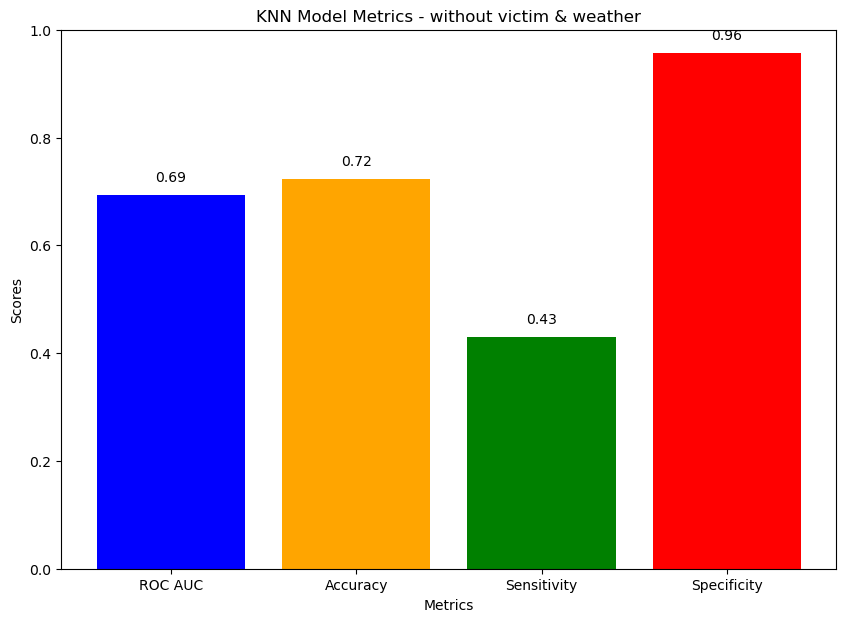

In [28]:
from sklearn.metrics import recall_score, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Define the specificity function
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred, labels=np.unique(y_true)).ravel()
    return tn / (tn + fp)

# Assuming y_pred is already defined from your KNN model predictions
# Calculate Sensitivity (Recall)
sensitivity_knn = recall_score(y_test, y_pred, average="macro")

# Binarize y_test for ROC AUC calculation
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

# Generate dummy probabilities for KNN since KNN does not provide predict_proba by default
# For a more accurate ROC AUC, consider using a classifier that provides probability estimates
y_pred_prob_dummy = np.zeros((y_test_binarized.shape[0], y_test_binarized.shape[1]))
for idx, label in enumerate(np.unique(y_test)):
    y_pred_prob_dummy[:, idx] = (y_pred == label).astype(int)

# Calculate ROC AUC
roc_auc_knn = roc_auc_score(y_test_binarized, y_pred_prob_dummy, multi_class="ovr", average="macro")

# Calculate Specificity
specificity_scores_knn = []
for class_label in np.unique(y_test):
    y_test_binary = (y_test == class_label).astype(int)
    y_pred_binary = (y_pred == class_label).astype(int)
    specificity_scores_knn.append(specificity(y_test_binary, y_pred_binary))

average_specificity_knn = np.mean(specificity_scores_knn)

# Creating a dictionary for metrics to plot
metrics_dict_knn = {
    'ROC AUC': roc_auc_knn,
    'Accuracy': accuracy_score(y_test, y_pred),
    'Sensitivity': sensitivity_knn,
    'Specificity': average_specificity_knn
}

# Print the metrics
print("ROC AUC:", roc_auc_knn)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity:", sensitivity_knn)
print("Specificity:", average_specificity_knn)

# Plotting the metrics
plt.figure(figsize=(10, 7))
plt.bar(metrics_dict_knn.keys(), metrics_dict_knn.values(), color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('KNN Model Metrics - without victim & weather')
plt.ylim(0, 1)
for i, v in enumerate(metrics_dict_knn.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()


In [29]:
# Take too long, not not sure it's work or not?

# from sklearn.inspection import permutation_importance
# # Calculating permutation feature importance
# perm_importance = permutation_importance(knn, X_test_scaled, y_test, n_repeats=10, random_state=42)

# # Map the importances to the feature names and sort them
# feature_names = X.columns
# feature_importance_df = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': perm_importance.importances_mean
# }).sort_values(by='Importance', ascending=False)

# # Plotting the feature importances
# plt.figure(figsize=(10, 12))
# sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
# plt.xlabel('Permutation Importance')
# plt.ylabel('Features')
# plt.title('Permutation Feature Importance for KNN Model')
# plt.tight_layout()  # Adjust the layout to fit all the labels
# plt.show()

In [30]:
# X columns
print('Shape of X:', X.shape)
print(X.columns)

Shape of X: (2883802, 56)
Index(['TIME_OCC', 'Part_1-2', 'Vict_Age', 'LAT', 'LON', 'Weapon_Reported',
       'AREA_2', 'AREA_3', 'AREA_4', 'AREA_5', 'AREA_6', 'AREA_7', 'AREA_8',
       'AREA_9', 'AREA_10', 'AREA_11', 'AREA_12', 'AREA_13', 'AREA_14',
       'AREA_15', 'AREA_16', 'AREA_17', 'AREA_18', 'AREA_19', 'AREA_20',
       'AREA_21', 'Day_of_Week_1', 'Day_of_Week_2', 'Day_of_Week_3',
       'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Year_2011', 'Year_2012',
       'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016', 'Year_2017',
       'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021', 'Year_2022',
       'Year_2023'],
      dtype='object')


# Summary for all models - without victim & weather

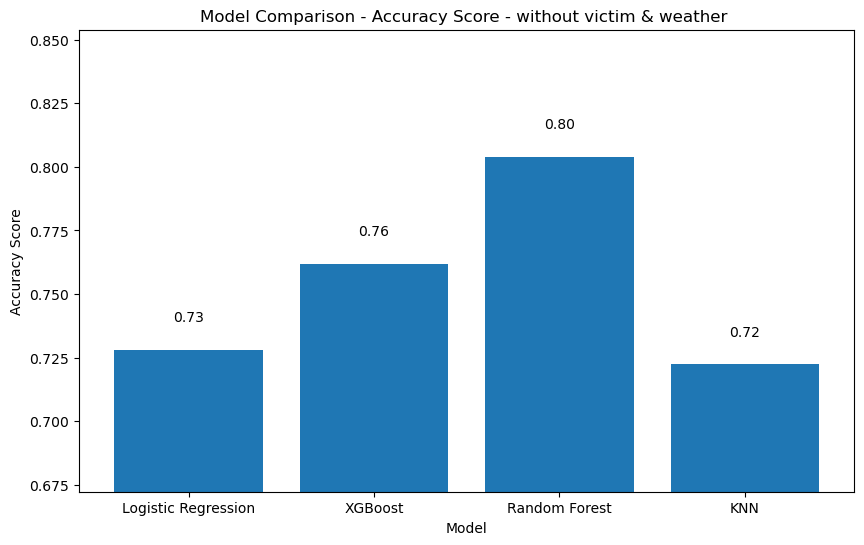

In [31]:
import matplotlib.pyplot as plt

# Placeholder for accuracy scores
accuracy_scores = {}

# Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg.predict(X_test_scaled))
accuracy_scores['Logistic Regression'] = logreg_accuracy

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
xgb_accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
accuracy_scores['XGBoost'] = xgb_accuracy

# Random Forest
rf_accuracy = accuracy_score(y_test, rf.predict(X_test_scaled))
accuracy_scores['Random Forest'] = rf_accuracy

# KNN
knn_accuracy = accuracy_score(y_test, knn.predict(X_test_scaled))
accuracy_scores['KNN'] = knn_accuracy

# Now create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values())
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison - Accuracy Score - without victim & weather ')
plt.ylim([min(accuracy_scores.values()) - 0.05, max(accuracy_scores.values()) + 0.05])
for i, v in enumerate(accuracy_scores.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()


In [32]:
# TP, FP, TN, and FN by model.

# Logistic Regression
y_pred = logreg.predict(X_test_scaled)
conf_matrix_logreg = metrics.confusion_matrix(y_test, y_pred)
TP_logreg = conf_matrix_logreg[1, 1]
FP_logreg = conf_matrix_logreg[0, 1]
TN_logreg = conf_matrix_logreg[0, 0]
FN_logreg = conf_matrix_logreg[1, 0]

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
conf_matrix_xgb = metrics.confusion_matrix(y_test_encoded, y_pred_xgb)
TP_xgb = conf_matrix_xgb[1, 1]
FP_xgb = conf_matrix_xgb[0, 1]
TN_xgb = conf_matrix_xgb[0, 0]
FN_xgb = conf_matrix_xgb[1, 0]

# Random Forest
y_pred_rf = rf.predict(X_test_scaled)
conf_matrix_rf = metrics.confusion_matrix(y_test, y_pred_rf)
TP_rf = conf_matrix_rf[1, 1]
FP_rf = conf_matrix_rf[0, 1]
TN_rf = conf_matrix_rf[0, 0]
FN_rf = conf_matrix_rf[1, 0]

# KNN
y_pred_knn = knn.predict(X_test_scaled)
conf_matrix_knn = metrics.confusion_matrix(y_test, y_pred_knn)
TP_knn = conf_matrix_knn[1, 1]
FP_knn = conf_matrix_knn[0, 1]
TN_knn = conf_matrix_knn[0, 0]
FN_knn = conf_matrix_knn[1, 0]

# Creating a DataFrame to summarize the model performance
model_performance_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest', 'KNN'],
    'TP': [TP_logreg, TP_xgb, TP_rf, TP_knn],
    'FP': [FP_logreg, FP_xgb, FP_rf, FP_knn],
    'TN': [TN_logreg, TN_xgb, TN_rf, TN_knn],
    'FN': [FN_logreg, FN_xgb, FN_rf, FN_knn]
})

# Display the summary table
print("Model Performance Summary - without victim & weather :")
print(model_performance_summary)


Model Performance Summary - without victim & weather :
                 Model     TP    FP      TN   FN
0  Logistic Regression  23438  1280  135094   58
1              XGBoost  29443   875  132930   57
2        Random Forest  31472   867  133869   82
3                  KNN  27138  1554  130768  651


In [35]:
from sklearn.metrics import matthews_corrcoef

# Logistic Regression
y_pred_lr = logreg.predict(X_test_scaled)
MCC_lr = matthews_corrcoef(y_test, y_pred_lr)

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
MCC_xgb = matthews_corrcoef(y_test_encoded, y_pred_xgb)

# Random Forest
y_pred_rf = rf.predict(X_test_scaled)
MCC_rf = matthews_corrcoef(y_test, y_pred_rf)

# KNN
y_pred_knn = knn.predict(X_test_scaled)
MCC_knn = matthews_corrcoef(y_test, y_pred_knn)

# Creating a dictionary for MCC values
MCC_dict = {
    'Logistic Regression': MCC_lr,
    'XGBoost': MCC_xgb,
    'Random Forest': MCC_rf,
    'KNN': MCC_knn
}

# Print the MCC values
print("Mathew's Correlation Coefficient - full: ")
for model, MCC in MCC_dict.items():
    print(f"{model}: {MCC}")


Mathew's Correlation Coefficient - full: 
Logistic Regression: 0.6319647902425419
XGBoost: 0.6775268985301833
Random Forest: 0.7347371137677523
KNN: 0.6216497128005672


In [33]:
from sklearn.metrics import cohen_kappa_score

# Logistic Regression
y_pred_lr = logreg.predict(X_test_scaled)
cohen_kappa_score_lr = cohen_kappa_score(y_test, y_pred_lr)

# XGBoost
y_pred_xgb = xgb_model.predict(X_test_scaled)
cohen_kappa_score_xgb = cohen_kappa_score(y_test_encoded, y_pred_xgb)

# Random Forest
y_pred_rf = rf.predict(X_test_scaled)
cohen_kappa_score_rf = cohen_kappa_score(y_test, y_pred_rf)

# KNN
y_pred_knn = knn.predict(X_test_scaled)
cohen_kappa_score_knn = cohen_kappa_score(y_test, y_pred_knn)

# Create a dictionary to store the data
data = {
    'Model': ['Logistic Regression', 'XGBoost', 'Random Forest', 'KNN'],
    'Cohen''s Kappa Score': [cohen_kappa_score_lr, cohen_kappa_score_xgb, cohen_kappa_score_rf, cohen_kappa_score_knn],
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print("Cohen's Kappa Score Summary - without victim & weather :")
print(df.to_string())


Cohen's Kappa Score Summary - without victim & weather :
                 Model  Cohens Kappa Score
0  Logistic Regression            0.624829
1              XGBoost            0.672420
2        Random Forest            0.731714
3                  KNN            0.617371


In [34]:
from sklearn.metrics import log_loss

# Logistic Regression
y_pred_prob_lr = logreg.predict_proba(X_test_scaled)
log_loss_lr = log_loss(y_test, y_pred_prob_lr)

# XGBoost
y_pred_prob_xgb = xgb_model.predict_proba(X_test_scaled)
log_loss_xgb = log_loss(y_test_encoded, y_pred_prob_xgb)

# Random Forest
y_pred_prob_rf = rf.predict_proba(X_test_scaled)
log_loss_rf = log_loss(y_test, y_pred_prob_rf)

# KNN
# KNN does not provide predict_proba by default
# For a more accurate log loss calculation, consider using a classifier that provides probability estimates
y_pred_prob_knn = np.zeros((y_test.shape[0], len(np.unique(y_test))))
for i, label in enumerate(np.unique(y_test)):
    y_pred_prob_knn[:, i] = (y_pred_knn == label).astype(int)
log_loss_knn = log_loss(y_test, y_pred_prob_knn)

# Creating a dictionary for log loss values
log_loss_dict = {
    'Logistic Regression': log_loss_lr,
    'XGBoost': log_loss_xgb,
    'Random Forest': log_loss_rf,
    'KNN': log_loss_knn
}

# Print the log loss values
print("Log Loss Values - without victim & weather:")
for model, log_loss in log_loss_dict.items():
    print(f"{model}: {log_loss}")


Log Loss Values - without victim & weather:
Logistic Regression: 0.7985377931123478
XGBoost: 0.6876504772878551
Random Forest: 0.7688483249730463
KNN: 10.008289551941123
